### Importing the two versions of a project

In [36]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
ant_1_3 = pd.read_csv("datasets/ant-1.3.csv")
ant_1_4 = pd.read_csv("datasets/ant-1.4.csv")
#lucene_2_0 = pd.read_csv("datasets/lucene-2.0.csv")
#lucene_2_2 = pd.read_csv("datasets/lucene-2.2.csv")

In [3]:
ant_1_3

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,ant,1.3,org.apache.tools.ant.taskdefs.ExecuteOn,11,4,2,14,42,29,2,...,1.0000,1,0.885057,0.232323,3,4,34.545455,3,1.2727,0
1,ant,1.3,org.apache.tools.ant.DefaultLogger,14,1,1,8,32,49,4,...,1.0000,0,0.000000,0.307692,0,0,16.857143,6,1.6429,2
2,ant,1.3,org.apache.tools.ant.taskdefs.TaskOutputStream,3,2,0,1,9,0,0,...,1.0000,1,0.714286,0.666667,1,1,17.333333,1,0.6667,0
3,ant,1.3,org.apache.tools.ant.taskdefs.Cvs,12,3,0,12,37,32,0,...,1.0000,1,0.770833,0.458333,0,0,24.083333,3,1.4167,0
4,ant,1.3,org.apache.tools.ant.taskdefs.Copyfile,6,3,0,4,21,1,0,...,1.0000,0,0.880952,0.416667,2,2,21.000000,1,0.8333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,ant,1.3,org.apache.tools.ant.taskdefs.Javadoc,65,3,0,21,155,1670,6,...,1.0000,5,0.370000,0.244141,3,3,21.830769,10,1.5231,0
121,ant,1.3,org.apache.tools.ant.BuildException,14,4,0,99,28,0,98,...,1.0000,1,0.650000,0.333333,1,2,9.785714,2,0.6429,0
122,ant,1.3,org.apache.tools.ant.IntrospectionHelper,14,1,0,24,63,63,20,...,0.4375,0,0.000000,0.333333,0,0,56.571429,24,2.7857,2
123,ant,1.3,org.apache.tools.ant.NoBannerLogger,4,2,0,3,16,0,0,...,1.0000,0,0.842105,0.875000,1,1,13.500000,5,1.7500,0


In [4]:
ant_1_4

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,ant,1.4,org.apache.tools.ant.taskdefs.PathConvert,14,3,0,8,41,33,1,...,1.000000,2,0.740000,0.357143,1,1,25.857143,4,1.5714,0
1,ant,1.4,org.apache.tools.ant.taskdefs.Untar,5,3,0,9,43,0,0,...,1.000000,0,0.902439,0.533333,2,3,53.600000,1,0.8000,0
2,ant,1.4,org.apache.tools.ant.taskdefs.PumpStreamHandler,13,1,1,8,20,46,6,...,1.000000,0,0.000000,0.615385,0,0,7.230769,1,0.7692,0
3,ant,1.4,org.apache.tools.ant.taskdefs.Copydir,8,4,0,7,35,4,0,...,1.000000,0,0.917647,0.468750,3,3,31.375000,5,1.3750,0
4,ant,1.4,org.apache.tools.tar.TarEntry,31,1,0,6,65,243,4,...,1.000000,0,0.000000,0.182796,1,1,22.612903,4,1.1613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,ant,1.4,org.apache.tools.ant.TaskAdapter,5,3,0,7,19,4,4,...,0.000000,0,0.902439,0.400000,1,1,28.800000,1,0.8000,0
174,ant,1.4,org.apache.tools.ant.taskdefs.rmic.DefaultRmic...,17,1,3,15,66,90,4,...,1.000000,2,0.000000,0.197917,0,0,35.882353,14,2.4118,0
175,ant,1.4,org.apache.tools.ant.IntrospectionHelper,23,1,0,31,82,201,22,...,0.444444,0,0.000000,0.318182,0,0,45.739130,24,2.3043,0
176,ant,1.4,org.apache.tools.ant.taskdefs.compilers.Defaul...,11,1,8,22,86,15,8,...,1.000000,7,0.000000,0.266667,0,0,77.727273,22,4.6364,1


In [5]:
#lucene_2_0

In [6]:
#lucene_2_2

### Asserting the columns are same the both the versions

In [7]:
columns_1_3 = ant_1_3.columns.to_list()

In [8]:
columns_1_4 = ant_1_4.columns.to_list()

In [12]:
c1 = Counter(columns_1_3)
c2 = Counter(columns_1_4)
assert c1==c2

In [13]:
print(len(columns_1_3))

24


#### Since both have same columns we can proceed by taking the latest version data for test data and the previous version data for training our model.

In [14]:
ant_1_4.dtypes

name        object
version    float64
name.1      object
wmc          int64
dit          int64
noc          int64
cbo          int64
rfc          int64
lcom         int64
ca           int64
ce           int64
npm          int64
lcom3      float64
loc          int64
dam        float64
moa          int64
mfa        float64
cam        float64
ic           int64
cbm          int64
amc        float64
max_cc       int64
avg_cc     float64
bug          int64
dtype: object

### Removing the unnecessary name, version and name.1 columns

In [15]:
columns_to_drop = ['name', 'version', 'name.1']
ant_1_3.drop(columns_to_drop, axis = 1, inplace = True) 
ant_1_4.drop(columns_to_drop, axis = 1, inplace = True) 

In [18]:
columns_1_3 = ant_1_3.columns.to_list()

In [19]:
columns_1_4 = ant_1_4.columns.to_list()

### Getting the count of unique values in each column.

In [20]:
unique_values = []

In [22]:
for i in range(len(columns_1_3)):
    unique = len(ant_1_3[columns_1_3[i]].value_counts())
    unique_values.append(unique)
    print(columns_1_3[i], ': ', unique)

wmc :  29
dit :  6
noc :  7
cbo :  29
rfc :  61
lcom :  50
ca :  21
ce :  18
npm :  25
lcom3 :  74
loc :  111
dam :  13
moa :  7
mfa :  52
cam :  73
ic :  5
cbm :  8
amc :  113
max_cc :  18
avg_cc :  67
bug :  4


In [ ]:
unique_values = []

In [23]:
for i in range(len(columns_1_4)):
    unique = len(ant_1_4[columns_1_4[i]].value_counts())
    unique_values.append(unique)
    print(columns_1_4[i], ': ', unique)

wmc :  32
dit :  6
noc :  10
cbo :  35
rfc :  75
lcom :  64
ca :  24
ce :  22
npm :  28
lcom3 :  92
loc :  146
dam :  19
moa :  9
mfa :  64
cam :  93
ic :  5
cbm :  10
amc :  148
max_cc :  21
avg_cc :  85
bug :  4


#### Looking at the count of unique values in each column in the two versions, there is no need to remove any column right now as non of them have only single unique value

### Finding the presence of null values in the dataset.

In [26]:
ant_1_3.isnull().sum()

wmc       0
dit       0
noc       0
cbo       0
rfc       0
lcom      0
ca        0
ce        0
npm       0
lcom3     0
loc       0
dam       0
moa       0
mfa       0
cam       0
ic        0
cbm       0
amc       0
max_cc    0
avg_cc    0
bug       0
dtype: int64

In [27]:
ant_1_4.isnull().sum()

wmc       0
dit       0
noc       0
cbo       0
rfc       0
lcom      0
ca        0
ce        0
npm       0
lcom3     0
loc       0
dam       0
moa       0
mfa       0
cam       0
ic        0
cbm       0
amc       0
max_cc    0
avg_cc    0
bug       0
dtype: int64

#### Since there are no null/missing values in the dataset, we can proceed further without dealing with null/missing values.

### Since all our data is numeric, let's see the range of values present in each column.

In [28]:
for i in range(len(columns_1_3)):
    ant_1_3_counts = ant_1_3[columns_1_3[i]].value_counts(ascending=True)
    print(ant_1_3_counts)

71     1
1      1
42     1
31     1
24     1
18     1
15     1
65     1
27     2
23     2
16     2
0      2
12     3
22     3
21     3
13     3
17     4
7      4
11     4
10     4
19     5
9      6
6      7
2      7
14     7
8     10
3     12
4     13
5     14
Name: wmc, dtype: int64
6     1
5     5
2    12
4    15
3    39
1    53
Name: dit, dtype: int64
5       1
11      1
34      1
2       2
4       2
1      10
0     108
Name: noc, dtype: int64
103     1
78      1
51      1
27      1
25      1
23      1
22      1
21      1
99      1
14      1
24      2
19      2
17      2
16      2
0       2
15      2
11      3
18      3
2       5
12      5
10      6
5       7
9       9
1       9
6      10
4      10
7      11
3      12
8      13
Name: cbo, dtype: int64
34     1
155    1
28     1
96     1
36     1
      ..
35     5
17     5
25     5
32     5
15     6
Name: rfc, Length: 61, dtype: int64
291      1
243      1
165      1
38       1
44       1
175      1
48       1
49       1
181      1
1

#### We see the counts of different unique values in each column.
#### To understand the distribution and range of values in each column, let's use describe() on the dataframe.

### Obtaining indetailed information of each feature.

In [30]:
ant_1_3.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.00000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,10.592000,2.280000,0.576000,10.432000,34.368000,69.320000,5.568000,5.240000,8.344000,0.879041,...,0.772186,0.70400,0.465290,0.487568,0.80800,1.128000,27.128042,4.224000,1.395237,0.264000
std,10.364406,1.280121,3.250965,14.891184,29.020998,259.281532,14.949019,4.433014,8.723443,0.547676,...,0.397125,1.20499,0.417885,0.251202,1.06025,1.679939,21.348723,4.952784,0.988485,0.685613
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,4.000000,15.000000,1.000000,0.000000,2.000000,4.000000,0.600000,...,0.750000,0.00000,0.000000,0.296296,0.00000,0.000000,12.500000,1.000000,0.833300,0.000000
50%,8.000000,2.000000,0.000000,7.000000,28.000000,6.000000,1.000000,5.000000,5.000000,0.742857,...,1.000000,0.00000,0.637931,0.440000,0.00000,0.000000,22.473684,3.000000,1.100000,0.000000
75%,14.000000,3.000000,0.000000,10.000000,46.000000,44.000000,4.000000,8.000000,11.000000,0.889423,...,1.000000,1.00000,0.880952,0.666667,1.00000,2.000000,34.545455,5.000000,1.600000,0.000000
max,71.000000,6.000000,34.000000,103.000000,186.000000,2247.000000,99.000000,21.000000,59.000000,2.000000,...,1.000000,7.00000,1.000000,1.000000,4.00000,7.000000,101.000000,35.000000,5.869600,3.000000


In [31]:
ant_1_4.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,10.494382,2.269663,0.584270,10.752809,33.837079,74.101124,5.691011,5.449438,8.196629,0.932824,...,0.701811,0.679775,0.467399,0.488047,0.662921,1.056180,26.664679,4.331461,1.377567,0.264045
std,10.988565,1.304179,3.337203,16.645035,30.663683,275.640663,16.494479,4.911675,9.166421,0.599130,...,0.435954,1.371105,0.415967,0.261298,1.024489,1.965002,24.840011,5.083175,0.993203,0.545085
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,3.250000,12.000000,0.000000,0.000000,2.000000,3.000000,0.608359,...,0.000000,0.000000,0.000000,0.291098,0.000000,0.000000,11.700000,1.000000,0.800000,0.000000
50%,7.000000,2.000000,0.000000,7.000000,24.000000,5.000000,1.000000,4.000000,5.000000,0.772381,...,1.000000,0.000000,0.604510,0.444444,0.000000,0.000000,20.666667,2.500000,1.019250,0.000000
75%,14.000000,3.000000,0.000000,11.000000,48.000000,41.000000,4.000000,8.000000,10.000000,0.968476,...,1.000000,1.000000,0.880952,0.666667,1.000000,1.000000,33.676740,5.000000,1.685900,0.000000
max,77.000000,6.000000,40.000000,136.000000,196.000000,2446.000000,135.000000,28.000000,68.000000,2.000000,...,1.000000,9.000000,1.000000,1.000000,4.000000,11.000000,208.166667,35.000000,6.087000,3.000000


#### We see that the range of each column is different and range of few columns is very small and few column values have a very broad range.
#### An Example of the above instance is:
* lcom: range = [0.000000	, 2446.000000]
* dam: range = [0.000000 , 1.000000	]

### Obtaining scatter plots for each feature for the two versions data.

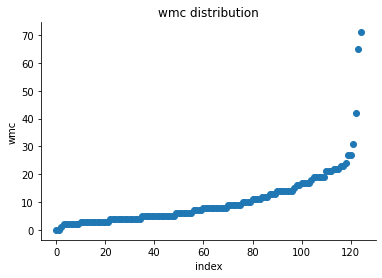

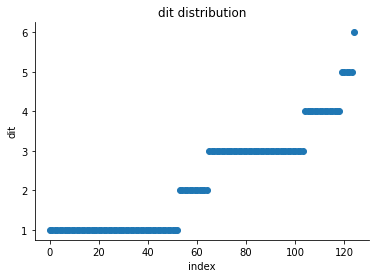

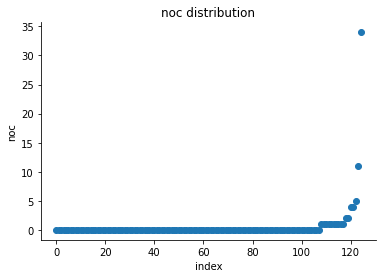

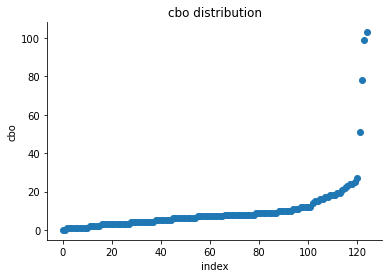

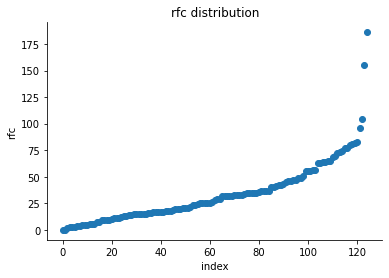

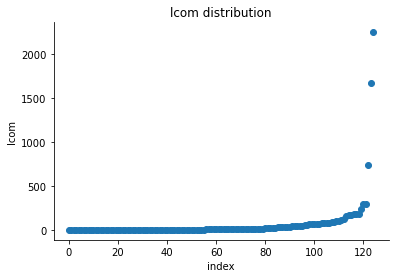

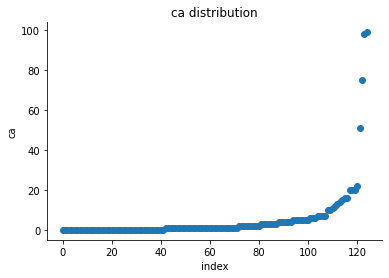

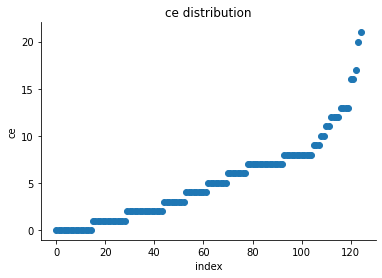

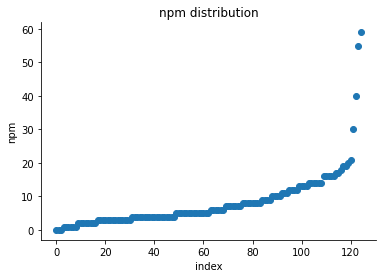

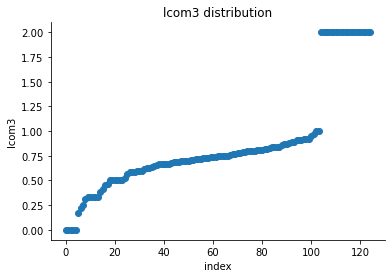

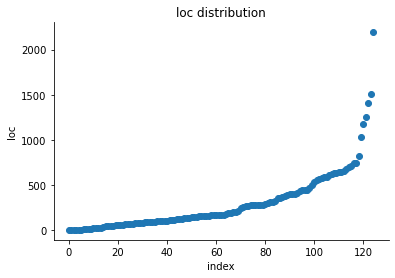

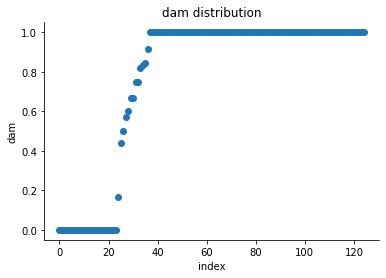

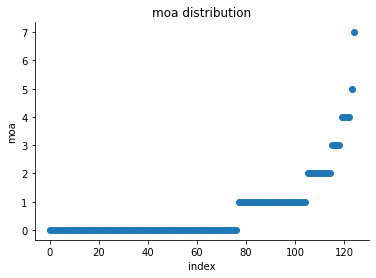

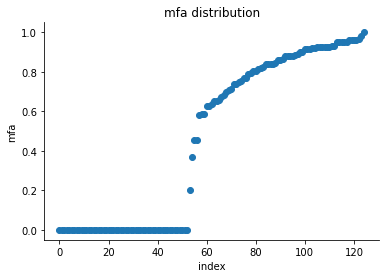

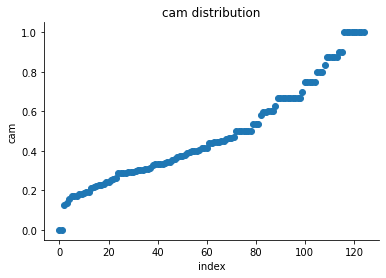

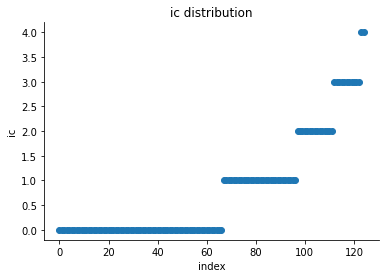

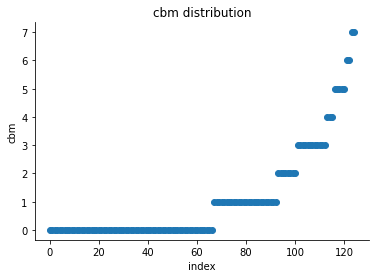

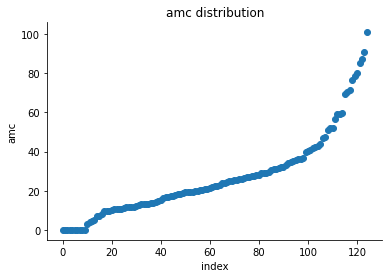

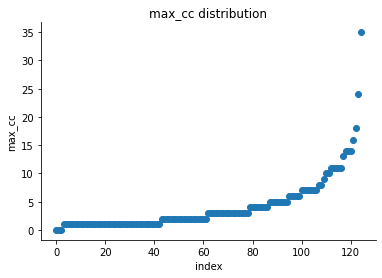

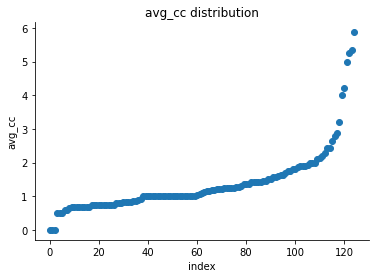

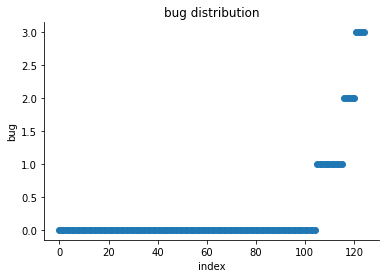

In [33]:
for i in range(len(columns_1_3)):
    plt.scatter(range(ant_1_3.shape[0]), np.sort(ant_1_3[columns_1_3[i]].values))
    plt.xlabel('index')
    plt.ylabel(columns_1_3[i])
    plt.title(columns_1_3[i] + " distribution")
    sns.despine()  
    plt.show()
    plt.close()

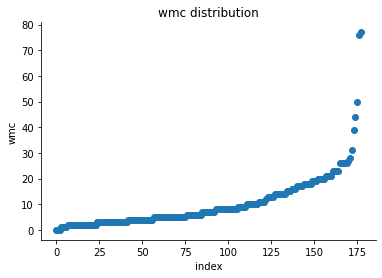

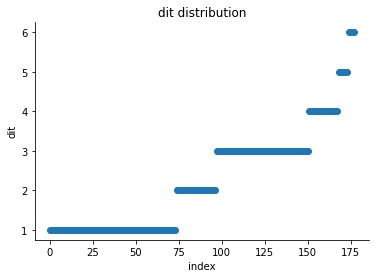

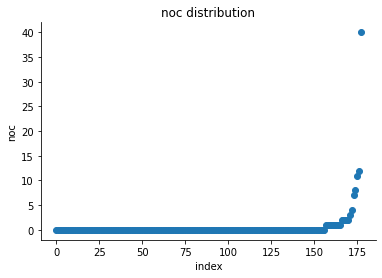

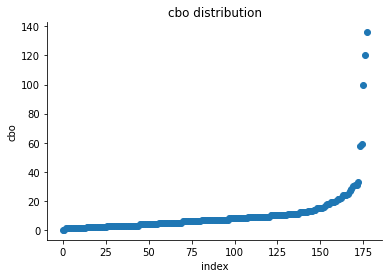

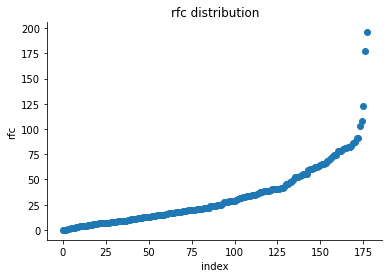

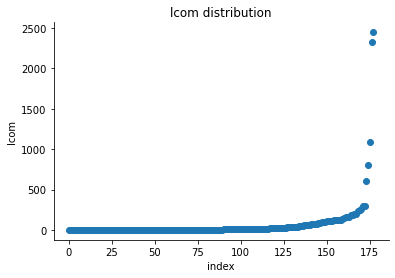

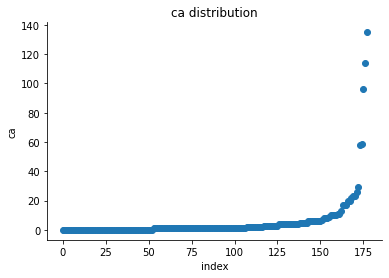

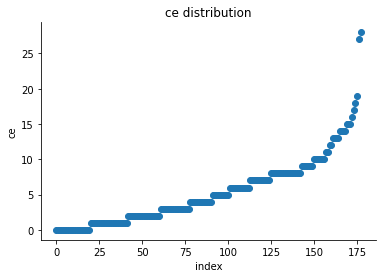

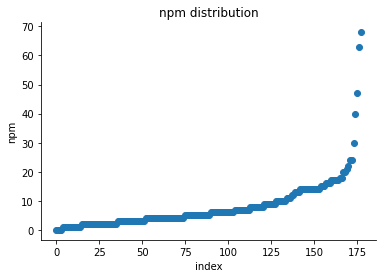

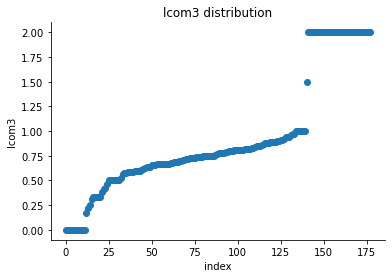

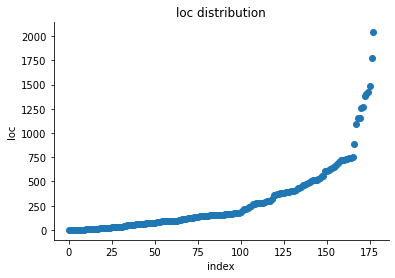

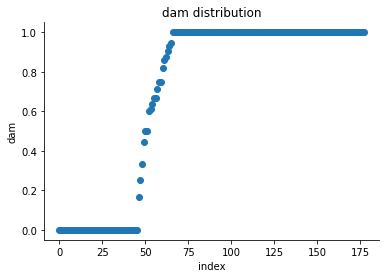

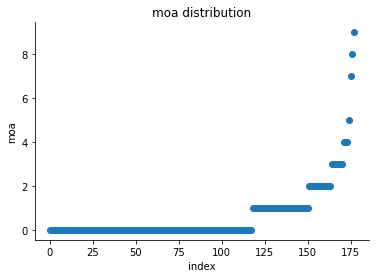

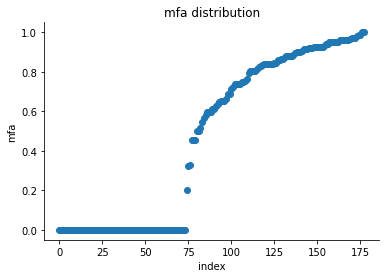

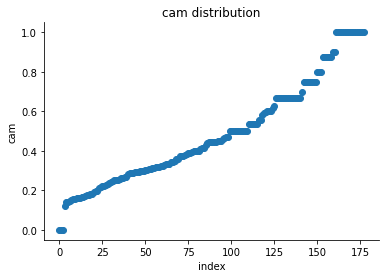

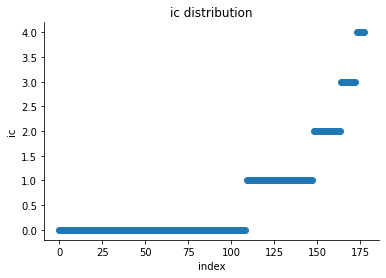

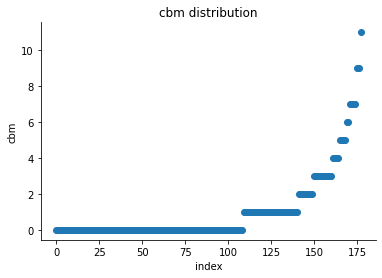

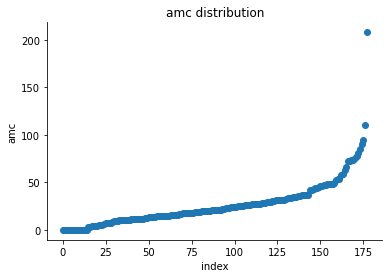

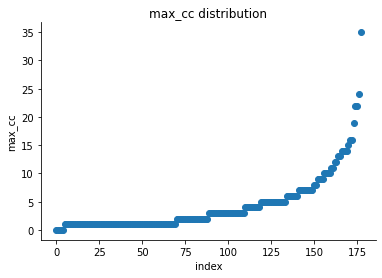

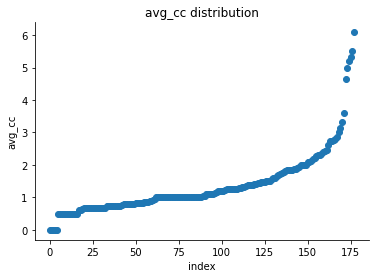

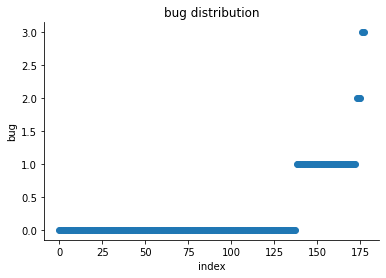

In [34]:
for i in range(len(columns_1_4)):
    plt.scatter(range(ant_1_4.shape[0]), np.sort(ant_1_4[columns_1_4[i]].values))
    plt.xlabel('index')
    plt.ylabel(columns_1_4[i])
    plt.title(columns_1_4[i] + " distribution")
    sns.despine()  
    plt.show()
    plt.close()

### Obtaining distribution plots for two versions data

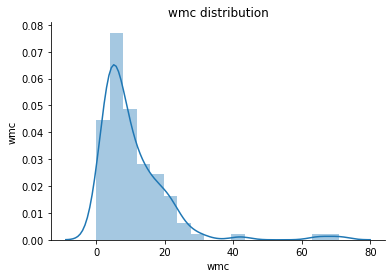

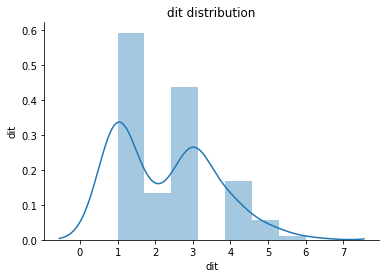

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


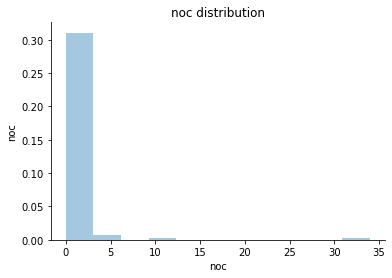

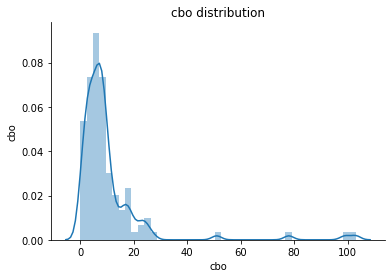

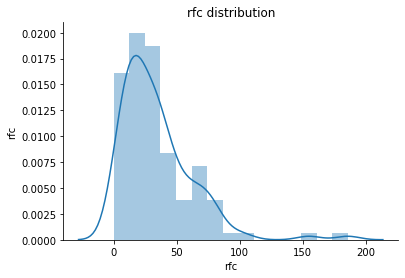

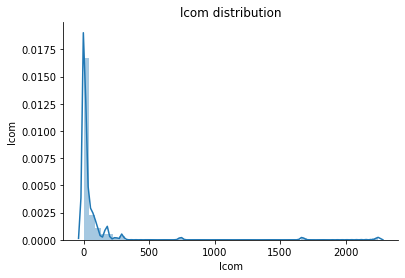

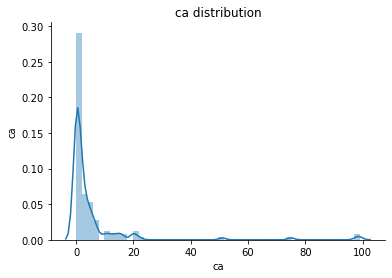

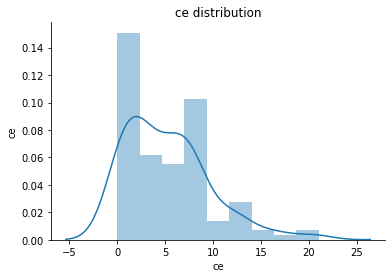

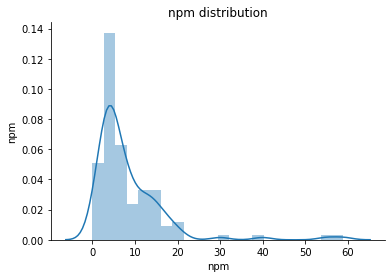

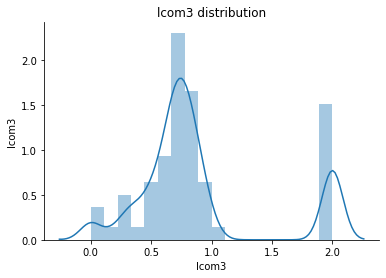

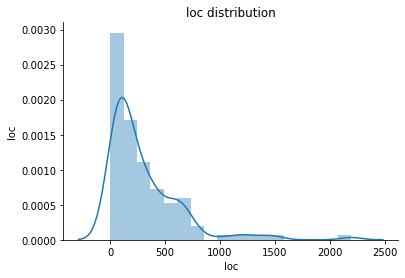

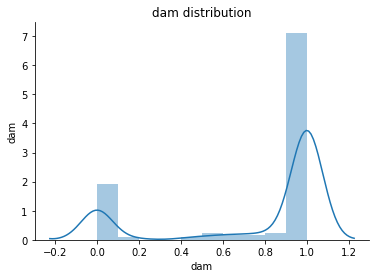

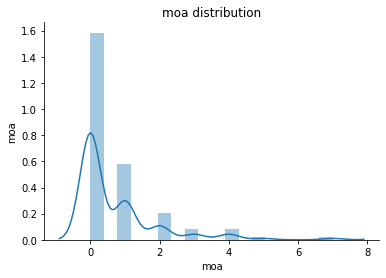

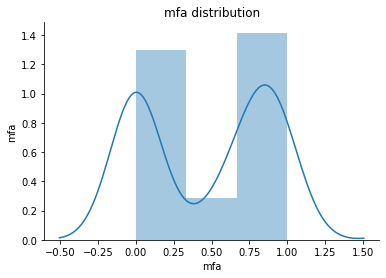

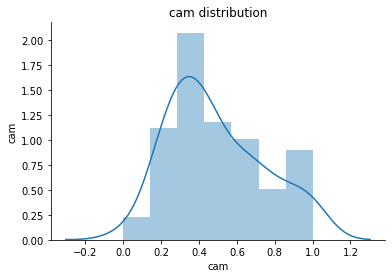

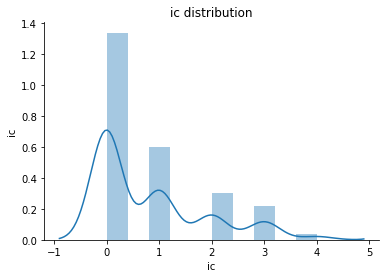

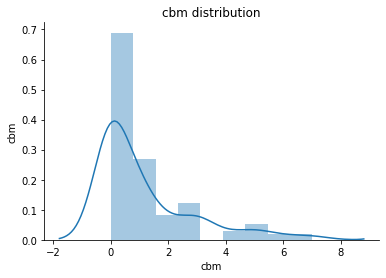

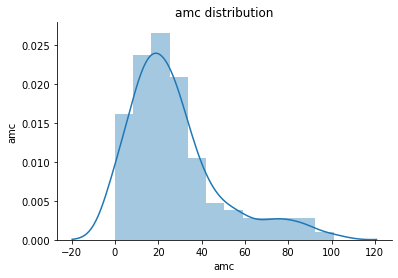

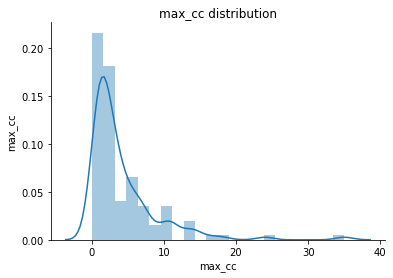

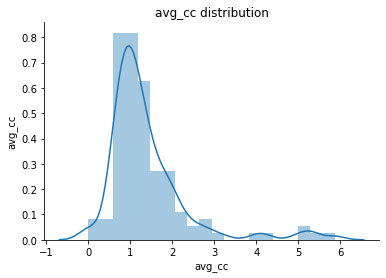

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


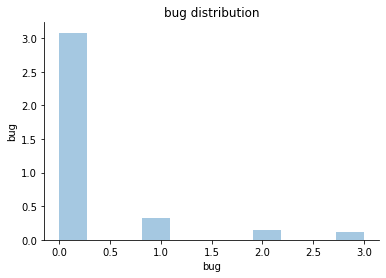

In [35]:
for i in range(len(columns_1_3)):
    #plt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))
    plt.xlabel('index')
    plt.ylabel(columns_1_3[i])
    sns.distplot(ant_1_3[columns_1_3[i]])
    plt.title(columns_1_3[i] + " distribution")
    sns.despine()  
    plt.show()
    plt.close()

### Let's apply min max scaling and check the distribution

In [45]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
ant_1_3[cols_to_norm] = pd.DataFrame(MinMaxScaler().fit_transform(ant_1_3[cols_to_norm]))
ant_1_3

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,0.154930,0.6,0.058824,0.135922,0.225806,0.012906,0.020202,0.571429,0.084746,0.362500,...,1.0000,0.142857,0.885057,0.232323,0.75,0.571429,0.342034,0.085714,0.216829,0
1,0.197183,0.0,0.029412,0.077670,0.172043,0.021807,0.040404,0.190476,0.203390,0.417582,...,1.0000,0.000000,0.000000,0.307692,0.00,0.000000,0.166902,0.171429,0.279900,2
2,0.042254,0.2,0.000000,0.009709,0.048387,0.000000,0.000000,0.047619,0.016949,0.000000,...,1.0000,0.142857,0.714286,0.666667,0.25,0.142857,0.171617,0.028571,0.113585,0
3,0.169014,0.4,0.000000,0.116505,0.198925,0.014241,0.000000,0.571429,0.203390,0.429293,...,1.0000,0.142857,0.770833,0.458333,0.00,0.000000,0.238449,0.085714,0.241362,0
4,0.084507,0.4,0.000000,0.038835,0.112903,0.000445,0.000000,0.190476,0.101695,0.350000,...,1.0000,0.000000,0.880952,0.416667,0.50,0.285714,0.207921,0.028571,0.141969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.915493,0.4,0.000000,0.203883,0.833333,0.743213,0.060606,1.000000,1.000000,0.458594,...,1.0000,0.714286,0.370000,0.244141,0.75,0.428571,0.216146,0.285714,0.259490,0
121,0.197183,0.6,0.000000,0.961165,0.150538,0.000000,0.989899,0.047619,0.237288,0.192308,...,1.0000,0.142857,0.650000,0.333333,0.25,0.285714,0.096888,0.057143,0.109530,0
122,0.197183,0.0,0.000000,0.233010,0.338710,0.028037,0.202020,0.952381,0.152542,0.420673,...,0.4375,0.000000,0.000000,0.333333,0.00,0.000000,0.560113,0.685714,0.474598,2
123,0.056338,0.2,0.000000,0.029126,0.086022,0.000000,0.000000,0.142857,0.067797,0.166667,...,1.0000,0.000000,0.842105,0.875000,0.25,0.142857,0.133663,0.142857,0.298146,0


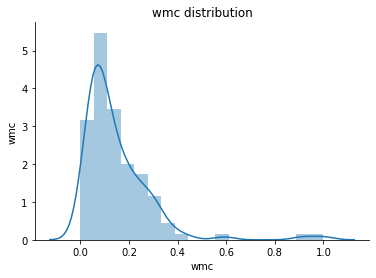

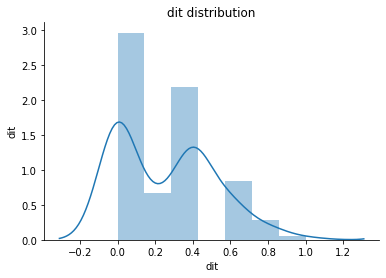

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


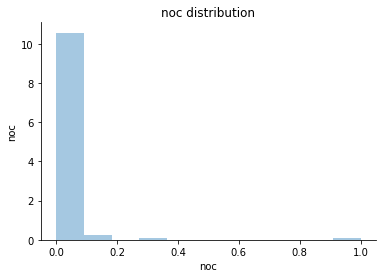

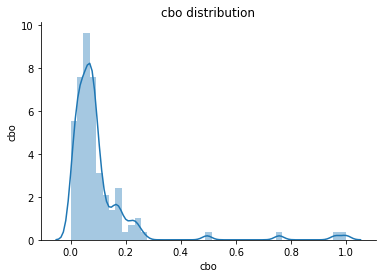

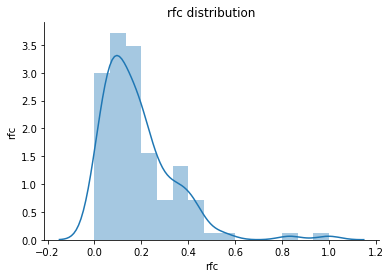

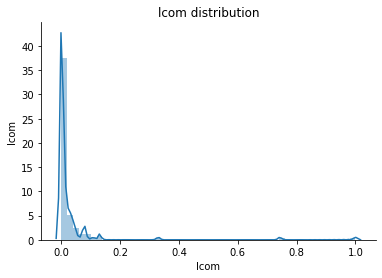

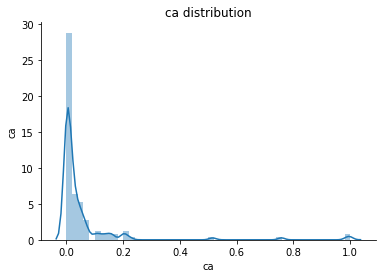

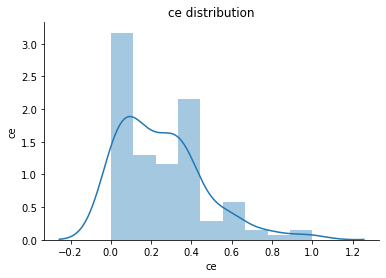

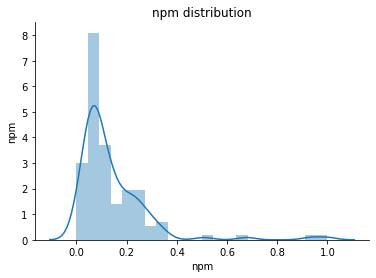

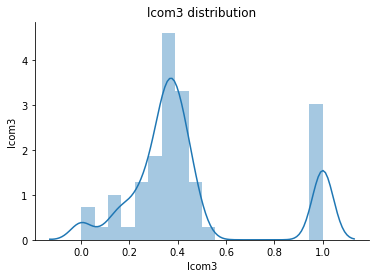

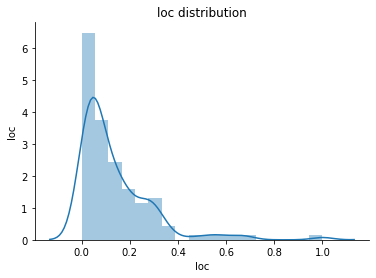

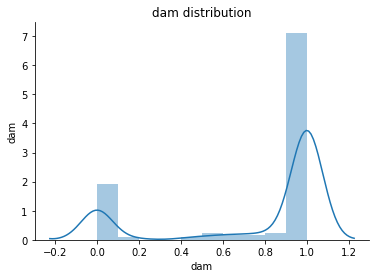

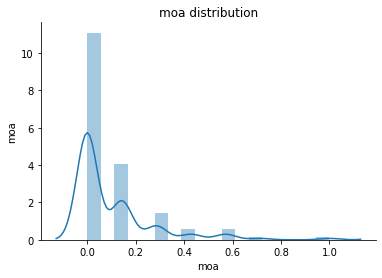

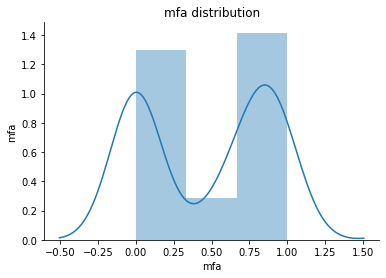

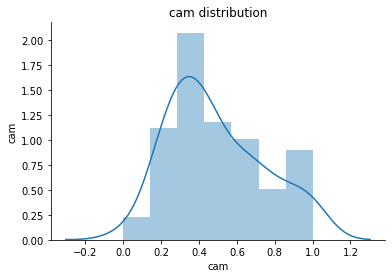

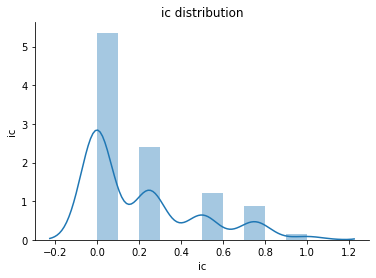

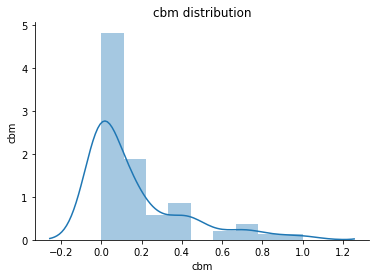

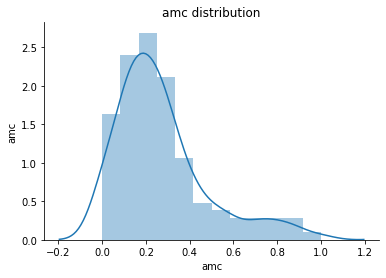

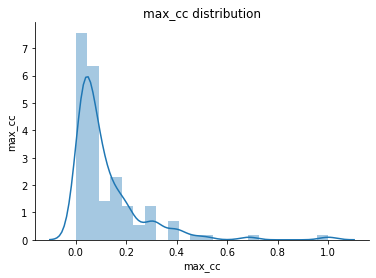

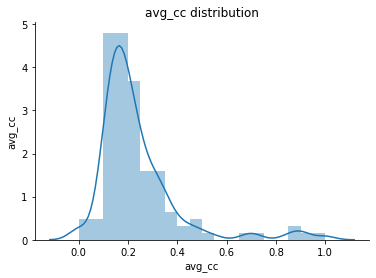

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


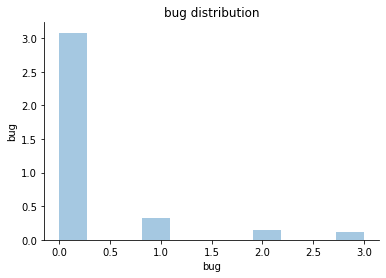

In [46]:
for i in range(len(columns_1_3)):
    #plt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))
    plt.xlabel('index')
    plt.ylabel(columns_1_3[i])
    sns.distplot(ant_1_3[columns_1_3[i]])
    plt.title(columns_1_3[i] + " distribution")
    sns.despine()  
    plt.show()
    plt.close()